In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [3]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [4]:
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols =["time",'wind_gust_o'],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
station["wind_gust_o"].value_counts(normalize=True).map(lambda n: '{:.1%}'.format(n))

M                     95.7%
12.346656              0.4%
11.317768000000001     0.4%
10.803324              0.4%
11.832212              0.3%
12.8611                0.3%
10.28888               0.3%
13.375544              0.3%
13.889988              0.2%
9.774436               0.2%
14.404432              0.2%
14.918876000000001     0.1%
9.259992               0.1%
15.43332               0.1%
8.745548               0.1%
15.947764000000001     0.1%
16.462208              0.1%
16.976652              0.1%
8.231104               0.1%
17.491096              0.1%
7.71666                0.1%
18.00554               0.0%
7.202216               0.0%
6.687772               0.0%
18.519984              0.0%
19.034428000000002     0.0%
20.063316              0.0%
20.57776               0.0%
19.548872              0.0%
21.092204              0.0%
22.635536000000002     0.0%
22.121092              0.0%
21.606648              0.0%
23.14998               0.0%
6.173328               0.0%
24.693312           

In [5]:
#label gust/no gust

station["wind_gust_l"] = "Gust"
mask = station['wind_gust_o'].str.contains("M")
station.loc[mask,["wind_gust_l"]] = "No Gust"

print(station.sample(100))
print("*****************************")
station["wind_gust_l"].value_counts(normalize=True)

                            wind_gust_o wind_gust_l
time                                               
2019-05-19 23:00:00                   M     No Gust
2020-01-03 15:30:00                   M     No Gust
2019-05-09 12:30:00           11.832212        Gust
2019-05-13 10:30:00                   M     No Gust
2019-11-07 17:30:00                   M     No Gust
2020-07-19 01:00:00                   M     No Gust
2019-12-27 21:30:00                   M     No Gust
2018-11-16 08:30:00                   M     No Gust
2018-11-30 03:30:00                   M     No Gust
2020-02-26 13:30:00                   M     No Gust
2020-06-05 13:30:00                   M     No Gust
2018-11-03 01:30:00                   M     No Gust
2020-04-01 15:30:00                   M     No Gust
2018-12-14 05:30:00                   M     No Gust
2018-10-20 06:30:00                   M     No Gust
2020-10-06 12:30:00                   M     No Gust
2020-10-13 12:30:00                   M     No Gust
2020-11-29 0

No Gust    0.956808
Gust       0.043192
Name: wind_gust_l, dtype: float64

**Forecast D1**

In [6]:
#ria forecast d0
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/lat42.22lon-8.63p2R1KmD1.csv",parse_dates=["time"]).set_index("time")

model1k

,Unnamed: 0,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00,0,325.189301,0.0,1740.084961,1.217145,2.264327,103401.195312,280.789246,0.781950,24135.000000,...,0.000000,0.000000e+00,0.142531,0.000000,0.0,0.142531,5735.675293,1613.937378,253.634506,281.908569
2019-01-02 01:00:00,1,333.670044,0.0,1731.173340,1.369249,2.540694,103382.539062,280.565735,0.778615,24135.000000,...,0.000000,0.000000e+00,0.112280,0.000000,0.0,0.112280,5732.622559,1611.490601,253.512878,281.793762
2019-01-02 02:00:00,2,351.552429,0.0,1721.331055,1.275996,2.367275,103355.875000,280.324890,0.790180,24135.000000,...,0.000000,-8.593750e-07,0.061034,0.000000,0.0,0.061034,5730.169434,1609.190552,253.402405,281.787689
2019-01-02 03:00:00,3,33.307388,0.0,1717.657593,0.696653,1.317065,103329.765625,280.101318,0.786697,24135.000000,...,0.000000,0.000000e+00,0.065096,0.000000,0.0,0.065096,5728.023926,1606.675903,253.443604,281.926819
2019-01-02 04:00:00,4,164.234100,0.0,1696.665771,0.224833,0.409460,103310.062500,279.779572,0.795685,24135.000000,...,0.000000,-2.343750e-09,0.085678,0.000000,0.0,0.085678,5725.899414,1604.329346,253.527298,281.808014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01 19:00:00,17491,297.835388,0.0,766.453003,6.263795,12.470805,101635.929688,279.777435,0.867834,24042.130859,...,99.540001,-7.467773e+00,0.000000,0.000000,0.0,0.000000,5371.030273,1446.678223,240.972382,271.724701
2021-01-01 20:00:00,17492,305.522644,0.0,769.984497,5.884632,12.509005,101664.109375,279.636444,0.861618,24046.214844,...,37.480000,-6.560820e+00,0.000000,0.077832,0.0,0.077832,5373.912109,1448.029297,241.139252,271.784821
2021-01-01 21:00:00,17493,304.144806,0.0,787.868713,6.053614,12.777985,101677.812500,279.624115,0.851240,24053.814453,...,25.900000,-1.712590e+01,0.000000,0.097343,0.0,0.097343,5376.250977,1449.369507,241.217819,271.922638


In [7]:
#concat station model
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wind_gust_o","Unnamed: 0"]).dropna()
df_all1k.sample(100)

,wind_gust_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-02-22 08:00:00,No Gust,160.568863,0.0,2027.598389,3.215639,5.542949,102554.703125,282.156189,0.804300,24135.000000,...,0.000000,0.000000e+00,0.508763,0.000000,0.000000,0.508763,5732.796875,1545.419800,259.260193,282.709198
2019-08-18 13:00:00,No Gust,290.231293,0.0,2815.010254,5.686983,6.756287,101754.335938,295.347260,0.655628,24135.000000,...,0.000000,3.437500e-04,0.000000,0.000000,0.000000,0.000000,5708.862305,1517.431763,262.308929,285.815674
2020-12-10 04:00:00,No Gust,298.766144,0.0,1983.883301,8.125345,12.714946,101323.921875,286.501495,0.999963,26.816671,...,85.000000,-1.562500e-04,0.200000,0.635488,0.500000,0.635488,5564.366211,1460.855103,257.847687,279.678375
2020-10-07 06:00:00,No Gust,259.259949,0.0,2682.788086,0.504060,0.949801,102468.734375,288.544312,0.999999,35.411781,...,0.738000,-1.562500e-05,0.000000,0.583752,0.000000,0.583752,5791.520020,1554.539551,266.334015,283.535492
2019-07-02 19:00:00,No Gust,6.270195,0.0,2879.045410,5.076447,8.589411,101242.531250,297.500305,0.689162,24135.000000,...,846.000000,-8.015699e+01,0.000000,0.000000,0.000000,0.000000,5714.264160,1512.954102,261.096680,289.275940
2019-01-25 16:00:00,No Gust,18.234966,0.0,1856.141602,2.523291,3.962034,102498.062500,285.009888,0.820091,24135.000000,...,0.000000,-3.554688e-05,0.091584,0.000000,0.000000,0.091584,5687.785645,1538.019165,256.559265,282.224182
2019-10-05 01:00:00,No Gust,303.150909,0.0,2745.721436,1.253445,1.543650,101975.156250,285.532867,0.986167,227.020676,...,1.922000,8.750000e-05,0.000000,0.639729,0.000000,0.639729,5753.628906,1512.800659,264.285400,286.828186
2019-12-02 02:00:00,No Gust,359.670685,0.0,1363.248901,6.014865,14.133113,101920.351562,280.608551,0.845224,24166.130859,...,0.000000,1.367188e-04,0.000000,0.000000,0.000000,0.000000,5521.976074,1472.936646,253.052307,274.995422
2019-11-29 06:00:00,No Gust,342.841461,0.0,1977.456543,0.139016,0.249859,101767.671875,284.718811,0.988710,24232.253906,...,0.000000,-4.833555e-02,0.260204,0.000000,0.000000,0.260204,5599.408203,1489.599365,256.562134,280.286865


In [8]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.wind_gust_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [01:24<00:00,  2.92s/it]


In [9]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.82,0.82,None,0.87,0.23
GaussianNB,0.81,0.81,None,0.86,0.14
QuadraticDiscriminantAnalysis,0.84,0.80,None,0.88,0.41
BernoulliNB,0.80,0.77,None,0.85,0.21
LinearDiscriminantAnalysis,0.95,0.73,None,0.95,0.41
BaggingClassifier,0.96,0.67,None,0.96,6.85
ExtraTreeClassifier,0.94,0.66,None,0.94,0.14
DecisionTreeClassifier,0.94,0.66,None,0.94,1.35
RandomForestClassifier,0.96,0.66,None,0.96,8.69


**ML LGBMClassifier**


Matriz de Confusión  (Machine Learning)

col_0        Gust  No Gust   All
wind_gust_l                     
Gust           73       65   138
No Gust       112     3183  3295
All           185     3248  3433
Heidke Skill Score: 0.43

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
Gust               0.39    0.53      0.45   138.00
No Gust            0.98    0.97      0.97  3295.00
accuracy           0.95    0.95      0.95     0.95
macro avg          0.69    0.75      0.71  3433.00
weighted avg       0.96    0.95      0.95  3433.00

Matriz de Confusión  (Machine Learning)

col_0        Gust  No Gust   All
wind_gust_l                     
Gust           59       79   138
No Gust       100     3195  3295
All           159     3274  3433
Heidke Skill Score: 0.37

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
Gust               0.37    0.43      0.40   138.00
No Gust            0.98 

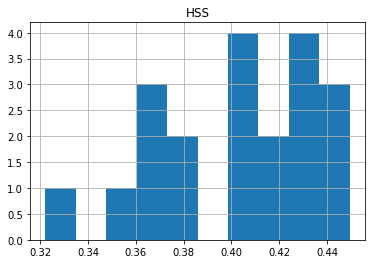

In [10]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

#select x variables
#x_var = df_all1k.drop(columns=["Unnamed: 0","wxcodes_o","brfg_l"]).columns.to_list()  

# X and Y
Y = df_all1k.wind_gust_l
X = df_all1k.iloc[:,1:]

# loop random
HSS = []
for t in range (0,20):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  #ml_model = NearestCentroid().fit(X_train,y_train)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadísticas HSS")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
print(pd.DataFrame(HSS,columns=["HSS"]).describe())

print(shapiro(HSS))
pd.DataFrame(HSS,columns=["HSS"]).hist();

**Add time features**

In [11]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.weekofyear

In [12]:

# X and Y
Y = df_all1k.wind_gust_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

100%|██████████| 29/29 [01:23<00:00,  2.86s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.86,0.79,None,0.90,0.44
NearestCentroid,0.83,0.78,None,0.88,0.26
SGDClassifier,0.93,0.78,None,0.94,0.60
GaussianNB,0.81,0.76,None,0.86,0.12
BernoulliNB,0.82,0.73,None,0.87,0.20
LinearDiscriminantAnalysis,0.95,0.72,None,0.95,0.29
PassiveAggressiveClassifier,0.90,0.72,None,0.92,0.36
ExtraTreeClassifier,0.94,0.67,None,0.94,0.13
DecisionTreeClassifier,0.94,0.67,None,0.94,1.12



Matriz de Confusión  (Machine Learning)

col_0        Gust  No Gust   All
wind_gust_l                     
Gust           59       75   134
No Gust       113     3186  3299
All           172     3261  3433
Heidke Skill Score: 0.36

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
Gust               0.34    0.44      0.39   134.00
No Gust            0.98    0.97      0.97  3299.00
accuracy           0.95    0.95      0.95     0.95
macro avg          0.66    0.70      0.68  3433.00
weighted avg       0.95    0.95      0.95  3433.00

Matriz de Confusión  (Machine Learning)

col_0        Gust  No Gust   All
wind_gust_l                     
Gust           78       79   157
No Gust        96     3180  3276
All           174     3259  3433
Heidke Skill Score: 0.44

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
Gust               0.45    0.50      0.47   157.00
No Gust            0.98 

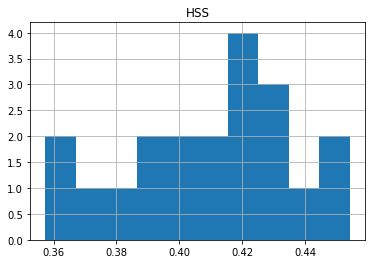

In [13]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

#select x variables
#x_var = df_all1k.drop(columns=["Unnamed: 0","wxcodes_o","brfg_l"]).columns.to_list()  

# X and Y
Y = df_all1k.wind_gust_l
X = df_all1k.iloc[:,1:]

# loop ranadom
HSS = []
for t in range (0,20):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model=LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadísticas HSS")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
print(pd.DataFrame(HSS,columns=["HSS"]).describe())

print(shapiro(HSS))
pd.DataFrame(HSS,columns=["HSS"]).hist();


In [14]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("gust_LEVX_1km_time_d1.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [15]:
import sklearn
print(sklearn.__version__)

0.24.1


In [16]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#select x variables
x_var = df_all1k.drop(columns=["wind_gust_l"]).columns.to_list() 

# X and Y
Y = df_all1k.wind_gust_l
X = df_all1k[x_var]

# loop ranadom
HSS = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = ExtraTreesClassifier(n_estimators=125).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadiísticas HSS")
pd.DataFrame(HSS,columns=["HSS"]).describe()


Matriz de Confusión  (Machine Learning)

col_0        Gust  No Gust   All
wind_gust_l                     
Gust           58       51   109
No Gust        69     2397  2466
All           127     2448  2575
Heidke Skill Score: 0.47

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
Gust               0.46    0.53      0.49   109.00
No Gust            0.98    0.97      0.98  2466.00
accuracy           0.95    0.95      0.95     0.95
macro avg          0.72    0.75      0.73  2575.00
weighted avg       0.96    0.95      0.96  2575.00

Matriz de Confusión  (Machine Learning)

col_0        Gust  No Gust   All
wind_gust_l                     
Gust           55       53   108
No Gust        83     2384  2467
All           138     2437  2575
Heidke Skill Score: 0.42

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
Gust               0.40    0.51      0.45   108.00
No Gust            0.98 

,HSS
count,10.00
mean,0.43
std,0.04
min,0.36
25%,0.41
50%,0.43
75%,0.46
max,0.47
